An analysis of the twittes and not_tweets dataset. similar to the reddit analysis.

In [ ]:
! pip install transformers
! pip install emoji
! gdown 1sxYXc7gy1ZaYW-L0geDXunEMZ3h9ixSl #twittes.json
! gdown 1bSFdlOetbkoKfxVo-9ItxdfLwJD7nhz8 #twittes_not.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
     |████████████████████████████████| 596 kB 44.2 MB/s 
     |████████████████████████████████| 101 kB 6.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.5 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=bd263c782e1e62d6cb69eab873f997af652a93b6fddb0d721ff8240a58bee2a2
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Downloading...
From: https://drive.google.com/uc?id=1sxYXc7gy1ZaYW-L0geDXunEMZ3h9ixSl

In [ ]:
import json

f = open('twittes.json')
twittes = json.load(f)
twittes = twittes['_default']
f.close()
f = open('twittes_not.json')
twittes_not = json.load(f)
twittes_not = twittes_not['_default']
f.close()

In [ ]:
import re
import emoji

def filter(com):
  return 'sarcasm' not in com and 'sarcastic' not in com


def clean_com(com):
  com = com.lower()
  com = re.sub(r'http\S+', '', com)
  com = re.sub("@[A-Za-z0-9_]+","", com)
  com = re.sub("#[A-Za-z0-9_]+","", com)
  com = re.sub("rt :","", com)
  com = re.sub("^ +","", com)
  com = re.sub(" +$","", com)
  com = re.sub("\n","", com)
  com = re.sub(" +"," ", com)
  return com

In [ ]:
sarc_comments = [clean_com(x['data']['fullText']) for x in twittes.values()]
sarc_comments = list(dict.fromkeys(sarc_comments))
#sarc_comments = [x for x in sarc_comments if 'sarcasm' not in x and 20 < len(x) < 150]
#sarc_comments = [x for x in sarc_comments if 'sarcastic' not in x]
non_sarc_comments = [clean_com(x['data']['fullText']) for x in twittes_not.values()]
non_sarc_comments = list(dict.fromkeys(non_sarc_comments))
#non_sarc_comments = [x for x in non_sarc_comments if 'sarcasm' not in x and 20 < len(x) < 150]
#non_sarc_comments = [x for x in non_sarc_comments if 'sarcastic' not in x]

In [ ]:
a = [x for x in sarc_comments if 'sarcastic' in x]
a[:20]

['where are all the sarcastic b on this app… 😭 i’m tired of carrying all the jokes.',
 'sarcastic mood 🤪available in my stores 👇link in bio✨',
 "it wasn't an assumption, it was a sarcastic reversal of what you wrote, eric with an h.🙄don't tell me you're uneducated as well!yikes!😂🤣",
 'sarcastic style 😎available in my stores 👇link in bio ✨',
 "today mom given the task to me.me: sarcastically said achha,( in mind 'ab ye karu?' )mummy ko laga me haa bola 😥😭sarcasm unho ne liya hi nahi.",
 'new trendy sarcastic quotes now available in my store 😎find it in my store 👇',
 'kawwa alias deepak should be given one more chance: rajat sharma (sarcastic) 🤣',
 'jay-z is sun else 😂😂💀“i dip, spit quicker than you ever seenadminister pain, next the minister\'s screamin\' your nameat your wake as i peek in, look in your casketfeelin\' sarcastic, "look at him, still sleepin\'" ',
 'people saying stupid things that aren’t funny either on social media and saying they were being ‘sarcastic’. 🤦🏽\u200d♂️',
 '

In [ ]:
print(len(sarc_comments))
print(len(non_sarc_comments))

78459
18142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


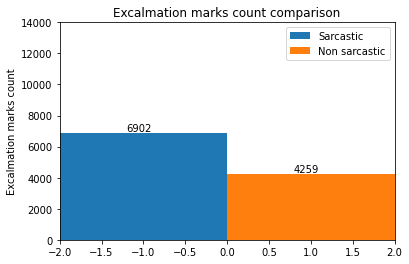

In [ ]:
import matplotlib.pyplot as plt

sarc_excal_count = 0
non_sarc_excal_count = 0
for com in sarc_comments:
  if '!' in com:
      sarc_excal_count += 1
for com in non_sarc_comments:
  if '!' in com:
    non_sarc_excal_count += 1


fig, ax = plt.subplots()
plt.bar(-1, sarc_excal_count, 2, label='Sarcastic')
plt.bar(1, non_sarc_excal_count, 2, label='Non sarcastic')
plt.axis([-2, 2, 0, 14000])
ax.set_xticks([-1,1], ['sarcastic', 'non sarcastic'])

ax.annotate(str(sarc_excal_count),(-1.2,sarc_excal_count+100))
ax.annotate(str(non_sarc_excal_count),(0.8,non_sarc_excal_count+100))
ax.set_ylabel('Excalmation marks count')
ax.set_title('Excalmation marks count comparison')
ax.legend()

plt.show()

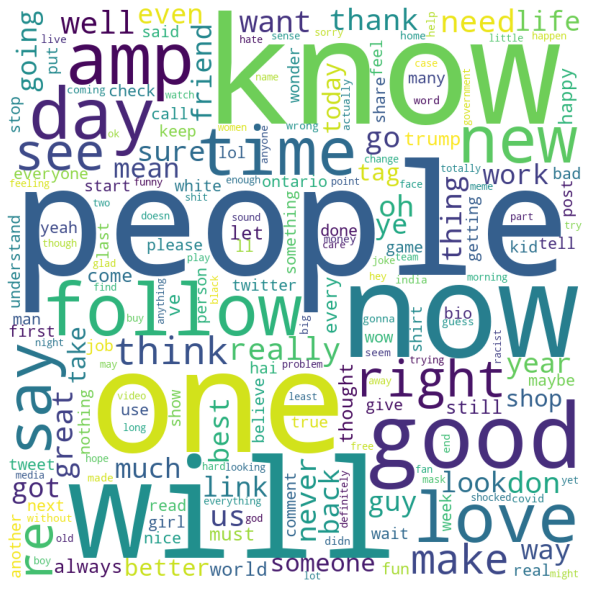

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sarc_words = ''
stopwords = set(STOPWORDS)

for sarc_com in sarc_comments:

    tokens = [w.lower() for w in sarc_com.split()]         
    sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                stopwords = stopwords,
                min_font_size = 10).generate(sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

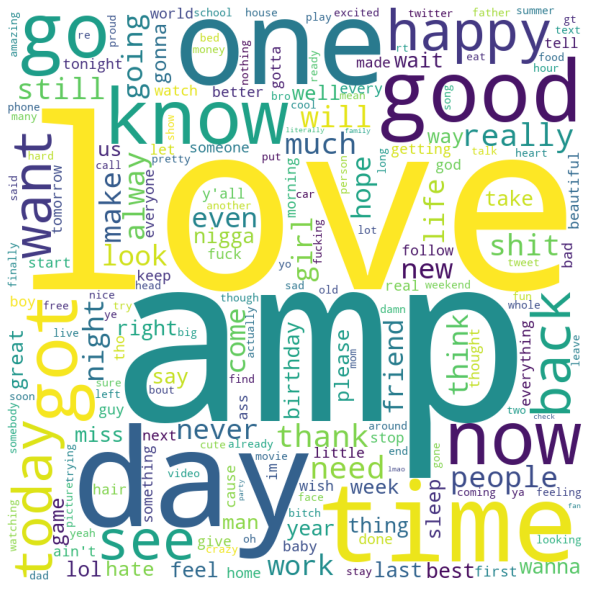

In [ ]:
non_sarc_words = ''
for non_sarc_com in non_sarc_comments:

    tokens = [w.lower() for w in non_sarc_com.split()]         
    non_sarc_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                stopwords = stopwords,
                min_font_size = 10).generate(non_sarc_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
X = []
Y = []
for com in sarc_comments:
  X.append(com)
  Y.append(1)
for com in non_sarc_comments:
  X.append(com)
  Y.append(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")


x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
lr_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),('clf',  LogisticRegression(penalty = 'l2', random_state= 42, solver='liblinear'))])
lr_clf.fit(x_train,y_train)
y_pred = lr_clf.predict(x_test)


In [ ]:
import pandas as pd

print(f"The accuracy on the training set is: {lr_clf.score(x_train,y_train)}")
print(f"The accuracy on the test set is:  {lr_clf.score(x_test,y_test)}")

report = classification_report(y_test,y_pred, output_dict=True, target_names=["not sarcastic", "sarcastic"])
report = pd.DataFrame(report)
report = report.rename({"1": "Sarcastic Comments", "0": "Non Sarcastic Comments"})
report

The accuracy on the training set is: 0.8911422606620937
The accuracy on the test set is:  0.753323108384458


,not sarcastic,sarcastic,accuracy,macro avg,weighted avg
precision,0.777000,0.732687,0.753323,0.754844,0.755051
recall,0.716981,0.790350,0.753323,0.753665,0.753323
f1-score,0.745785,0.760427,0.753323,0.753106,0.753038
support,7897.000000,7751.000000,0.753323,15648.000000,15648.000000


In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 24.3 MB/s 
     |████████████████████████████████| 133 kB 58.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3d7ff29c46e931fb61957b741ce82a44109278f962c6473dbd8d03a6c5a48180
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [ ]:
import eli5
eli5.explain_weights(lr_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+6.565,ontario
+5.180,follow
+4.574,covid
+4.553,hai
+4.303,tag
+4.272,of
+3.879,sure
+3.802,their
+3.782,because
+3.750,trump


In [ ]:
# from transformers import pipeline

# model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

# classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
# sarc_sentiment = classifier(sarc_comments[:9000])
# non_sarc_sentiment = classifier(non_sarc_comments[:9000])

# sarc_pos = [x['score'] for x in sarc_sentiment if x['label'] == 'Positive']
# sarc_neg = [x['score'] for x in sarc_sentiment if x['label'] == 'Negative']
# sarc_neu = [x['score'] for x in sarc_sentiment if x['label'] == 'Neutral']
# non_sarc_pos = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Positive']
# non_sarc_neg = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Negative']
# non_sarc_neu = [x['score'] for x in non_sarc_sentiment if x['label'] == 'Neutral']


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
# import numpy as np

# print("Positive sarcasm:    ",len(sarc_pos), "  Avarage score:", np.mean(sarc_pos))
# print("Neutral sarcasm:     ",len(sarc_neu), "  Avarage score:", np.mean(sarc_neg))
# print("Negative sarcasm:    ",len(sarc_neg), "  Avarage score:", np.mean(sarc_neg))
# print("Positive non sarcasm:",len(non_sarc_pos), "  Avarage score:", np.mean(non_sarc_pos))
# print("Neutral non sarcasm: ",len(non_sarc_neu), "  Avarage score:", np.mean(non_sarc_pos))
# print("Negative non sarcasm:",len(non_sarc_neg), "  Avarage score:", np.mean(non_sarc_neg))

Positive sarcasm:     2756   Avarage score: 0.793148386017764
Neutral sarcasm:      3011   Avarage score: 0.7366357478256975
Negative sarcasm:     3233   Avarage score: 0.7366357478256975
Positive non sarcasm: 4266   Avarage score: 0.8666493655145308
Neutral non sarcasm:  2442   Avarage score: 0.8666493655145308
Negative non sarcasm: 2292   Avarage score: 0.7677313729756582


In [ ]:
def extract_emojis(s):
  return [d['emoji'] for d in emoji.emoji_list(s)]

In [ ]:
from collections import Counter

sarc_comments_unfiltered = [x['data']['fullText'] for x in twitter_data.values()]
sarc_emojis = []
non_sarc_emojis = []

for x in sarc_comments_unfiltered:
  sarc_emojis += extract_emojis(x)
for x in not_sarc_twitter_data:
  non_sarc_emojis += extract_emojis(x)

c1 = Counter(sarc_emojis)
c2 = Counter(non_sarc_emojis)

print("num of sarcastic comments:",len(sarc_comments_unfiltered))
print("num of non sarcastic comments:",(len(not_sarc_twitter_data)))

print("sarcastic: total ",len(sarc_emojis),c1.most_common(20))
print("not sarcastic: total ",len(non_sarc_emojis),c2.most_common(10))

num of sarcastic comments: 99617
num of non sarcastic comments: 53215
sarcastic: total  204391 [('😂', 42420), ('🤣', 15933), ('🙄', 13206), ('🤔', 5624), ('😉', 4191), ('😒', 3479), ('😜', 3354), ('😆', 3351), ('😁', 3237), ('😅', 2397), ('😏', 2260), ('👏', 2155), ('❤️', 2115), ('😎', 1880), ('👍', 1817), ('🙃', 1776), ('🤪', 1684), ('😝', 1678), ('😭', 1620), ('😳', 1559)]
not sarcastic: total  61673 [('😂', 5863), ('😍', 2101), ('😭', 1986), ('🙄', 1670), ('❤️', 1648), ('😊', 1454), ('😩', 1364), ('🤔', 1187), ('😘', 1060), ('💯', 928)]
